### **Real Estate Investemnt at Saudi Arabia Market**

Member 1: Ahmed Alzahrani, Contribution: 100%
Member 2: Abdulrahman Albeladi, Contribution: 100%

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.
Ahmed Alzahrani, 7 May, 2024
Abdulrahman Albeladi, 7 Mat, 2024

Ahmed Alzahrani: Handled Conclusions 1 and 2. Handled Machine Learning section. Found the chosen database.
Abdulrahman Albeladi: Handled Conclusion 3. Handled visual graphs. Handled the introduction and description of the document.

Names:
Abdulrahman Albeladi 119271452
Ahmed Alzahrani 119271896

# Communication

issues in the dataset and how to handle them:
- huge in size (1.1 GB); this can be addressed by deleting unused columns and non-needed categroies.
- not all columns are relevant; we can get rid of columns such as "link", "path", "images", "latitude"...
- columns named with dots like "user.review" cannot be selected in queries (no such column issue); we should address this by changing th dots to underscore.
- kitchen column is named ketchen; we can just change that as well.
- category numbering not intuitive; we need a dictionary for easier reference.



Our data has 23 different categories. Each category indicates the type of proprety and whether it's for sale of rental.
category column description:
- - 1= Apartment, rental
- - 2= Land, sell
- - 3= Villa, sell
- - 4= Floor, rental
- - 5= Villa, rental
- - 6= Apartment, sell
- - 7= Building, sell
- - 8= Store, rental
- - 9= House, sell
- - 10= Esterahah, sell
- - 11= House, rental
- - 12= Farm, sell
- - 13= Esterahah, rental
- - 14= Office, rental
- - 15= Land, rental
- - 16= Building, rental
- - 17= Warehouse, rental
- - 18= Campsite, rental
- - 19= Room, rental
- - 20= Store, sell
- - 21= Furnished apartment
- - 22= Floor, sell
- - 23= Chalet, rental

It's important to note the significant differences and values of these categories as these factors make huge disparities in their price, location, area, preference of investment, and many other considerations. It would be unfair to compare the prices or areas of houses with Esterahahs (motel) for example. We need to use our economical/societal awareness as well as our knowledge about these differences to make valid choices of what to explore, study, and analyze.

# Introduction

Real Estate is one of the, if not the most, crucial and largest parts of economy. Investements in real estate has been a highly recommended and a very profitbale way throught the past decades as housing andlnads prices as increased dramtically in many places around the world. Thanks to the new world stable world system, full of technologies and medical advancements to ease life and increase average life span, the Earth population has gone up to unprecdented rates. Socities are moving to advanced citiies influenced by modernization. Inflation of goods and currencies has shown constant rise in the past 7 decades. All this accumulating to the increasing value of real estate over time, making one of the most successfull investments one could make.

With no income taxes, low maintainance costs, and no bank interest, Saudi Arabia becomes a very reliable country to invest in its real estate. The period the country is living today is one where changes are happening rapidly in every measure and every field as its 2030 vision is strongly making the wanted change. This is resulting in a numerous inflation, especially in real estate.

Our goal in this report, is to look at large exisitng data of real estate in Saudi Arabia and analyze its various aspects. We will focus on the most important regions to invest in and the different carestaristics of properties to invest in. Moreover, we will use machine learning to identify the best model tomake maximum profit out of investment.


Datasets: Saudi Arabia Real Estate Dataset (AQAR)
Table: "Listings"
https://colab.research.google.com/drive/1cIdILK0Kyt_swUAszAAplU2e8fsCZAK6#scrollTo=b_ZrP1zn-aPw&line=7&uniqifier=1

Reasons of choosing this specifc dataset:
First, we do not consider any dataset that is not large, looks messy, excludes categorical
or continuous data types, or is visual or auditory. Then, we look for datasets that inform
decisions we sometime in my life will probably seek advice to make anyways, hence my
interest in investing. We chose tis dataset because real estate is more likely to be
necessary sometime in my life than stock shares are, because we want to learn to
manipulate non-ASCII data as well as ASCII data, and because we likely will spend most my life in Saudi Arabia.

# Data Preprocessing

The stage of processing the data is vital since it paves the way for using the data for analysis, machine training and testing, or visual graphing.
We will start by setting up the environment by importing all the needed tools and libraries for our use.
Then comes the proccess of deleting unwanted columns from data, deleting non-needed categroies, changing somecolumn names, and fixing category numbering.

## setup

In [109]:
# import libraries
import sqlite3
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [110]:
# set up sql connection
conn = sqlite3.connect("database.db")
crsr = conn.cursor()

## parsing

In [111]:
query = 'SELECT * FROM Listings'

df = pd.read_sql(query, conn)
df.head()

,user_id,id,uri,title,price,content,imgs,refresh,category,beds,...,district,district_id,width,length,advertiser_type,create_time,has_extended_details,daily_rentable,createdAt,updatedAt
0,10065,4331,شارع-الياقوت-الدار-البيضاء-الرياض,"أرض للبيع في شارع الياقوت, الدار البيضاء, الرياض",1958400.0,تجاريه ش ياقوت ٦٠ مساحه ٨١٦ تقريبا,"[""000000000_1627687178830.jpg""]",1672495809,2,0.0,...,حي الدار البيضاء,424,25.0,32.0,None,1415294130,NaN,0.0,2023-01-01 14:13:28.553 +00:00,2023-01-01 14:13:28.553 +00:00
1,11005,4837,طريق-الملك-عبدالله-بن-عبدالعزيز-الفرعي-المغرزا...,أرض للبيع في طريق الملك عبدالله بن عبدالعزيز ا...,15078000.0,الارض على طريق الملك عبدالله على شارعين مظاهره...,"[""000000000_1627687181813.jpg""]",1672040788,2,0.0,...,حي المغرزات,566,NaN,NaN,None,1416054461,NaN,0.0,2023-01-01 14:52:38.169 +00:00,2023-01-01 14:52:38.169 +00:00
2,8017,5498,5-المملكة-العربية-السعودية-5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,الارض استثماريه في محافظة البرك طريق جده جازان...,"[""506610555_1417214243205.jpg"",""506610555_1417...",1671819056,2,0.0,...,حي الروضة,4100,NaN,NaN,None,1417220044,NaN,0.0,2023-01-01 15:01:52.351 +00:00,2023-01-01 15:01:52.351 +00:00
3,13810,6520,شارع-Saher-Al-Garbee-St-ذهبان,"أرض للإيجار في شارع الهزاعية, حي العشيرية, جدة",50000.0,السلام عليكم ورحمة الله وبركاته\nوكل عام وانتم...,"[""504121665_1418232181483.jpg"",""504121665_1418...",1672190424,15,0.0,...,حي الرياض,3490,20.0,20.0,None,1418232587,NaN,0.0,2023-01-01 14:43:23.326 +00:00,2023-01-01 14:43:23.326 +00:00
4,5234,8847,طريق-الملك-خالد-حي-الثقبة-الخبر-الخبر-8847,أرض للبيع في طريق الملك خالد ، حي الثقبة ، الخ...,3000000.0,ارض للبيع لبناء شقق فندقيه او عمارات سكنيه خلف...,"[""567772202_1632148243568.png"",""000052346_1661...",1672253180,2,0.0,...,حي الثقبة,1060,NaN,NaN,None,1420232812,NaN,0.0,2023-01-01 14:38:46.004 +00:00,2023-01-01 14:38:46.004 +00:00


In [ ]:
print(df.shape)
print(df.columns)

(663946, 48)
Index(['user_id', 'id', 'uri', 'title', 'price', 'content', 'imgs', 'refresh',
       'category', 'beds', 'livings', 'wc', 'area', 'type', 'street_width',
       'age', 'last_update', 'street_direction', 'ketchen', 'ac', 'furnished',
       'location.lat', 'location.lng', 'path', 'user.review', 'user.img',
       'user.name', 'user.phone', 'user.iam_verified', 'user.rega_id',
       'native.logo', 'native.title', 'native.image', 'native.description',
       'native.external_url', 'rent_period', 'city', 'city_id', 'district',
       'district_id', 'width', 'length', 'advertiser_type', 'create_time',
       'has_extended_details', 'daily_rentable', 'createdAt', 'updatedAt'],
      dtype='object')


As we can see, there are many unnecessary, unused columns that only consume more space and make it hard to focus and think straight. We will not include thise in our data frame.

## organizing

We are getting rid ofunwanted columns in this frame. We are also changing some column names, replacing dots with underscores. We are limitng the data df2 to categroy 2 in this case (land, sell)

In [ ]:
# take relevant columns
# problem: no such column as user.review
query = 'SELECT user_id, id, price, category, area, street_width, [user.review] as user_review, [user.name] as user_name, city, city_id, district, district_id, width, length, advertiser_type, updatedAt FROM Listings WHERE category == 2 ORDER BY price'

df2 = pd.read_sql(query, conn)
df2.head()

,user_id,id,price,category,area,street_width,user_review,user_name,city,city_id,district,district_id,width,length,advertiser_type,updatedAt
0,5138,5480268,1.0,2,625,NaN,3.00,مكتب متعب بن مرزوق بن عواد الضبيب للعقارات,الزلفي,22,حي المنتزة,754,NaN,NaN,agent,2023-08-01 22:30:26.700 +00:00
1,5138,5489283,1.0,2,906,NaN,3.00,مكتب متعب بن مرزوق بن عواد الضبيب للعقارات,الزلفي,22,حي عريعرة,770,NaN,NaN,agent,2023-08-04 18:02:21.975 +00:00
2,3314828,5444502,225.0,2,690,NaN,NaN,محمد بن احمد بن موسى الزهراني,القنفذة,34,حي الخالدية,3382,NaN,NaN,None,2023-07-07 22:49:33.266 +00:00
3,125255,5483774,370.0,2,12648,NaN,4.55,مكتب ربوة الشمال للعقارات,المزاحمية,43,حي الغطغط,886,NaN,NaN,agent,2023-08-01 22:31:54.813 +00:00
4,27495,5485691,380.0,2,745,NaN,4.42,ابو فهد للعقارات,الرياض,21,حي الشرق,476,NaN,NaN,owner,2023-08-01 22:29:48.738 +00:00


In [ ]:
print(df2.dtypes)

user_id              int64
id                   int64
price              float64
category             int64
area                 int64
street_width       float64
user_review        float64
user_name           object
city                object
city_id              int64
district            object
district_id          int64
width              float64
length             float64
advertiser_type     object
updatedAt           object
dtype: object


These are the new columns that we should use with their modified names. It's important to note that numericals such as price, street_width, and user_review are float numbers and not integers since they represint decimal values.

# Exploratory Data Analysis

We are interested to invest in land estate in a particular city in Saudi Arabia with particular specifications (mainly, area). We will make our choices based on statistical methods.

To explore the data we now have using several testing methods, we want to think of helpful ideas to gather insights of the correlations between columns in the data.

* We consider investing in a particular category in a particular city with specific area range and, if applicable, specifications.

* We consider the general correlation between area and price.

* We consider the correlation between street width and price with ~fixed area.

* We consider the relationship between user_review and appropriateness of price.

* We consider advertiser type (owner vs agent) effect.

* We consider making a table of price-per-meter-squared for each district for (one / every) city.

* We consider analyzing price difference between land and building with similar land specifications

## conclusion 1: Outliers of Area and Price

A good way to start exploring is to clear data from outliers. Those might cause some unrealistic effect on results as they show rare and special cases that we may not be interested in studying. For example, lands of the royal family, lands in private owned regions, or ones used for industrial or military purposes and such.

We first start by removing row duplicates, and then we set a larger unit of 1000 for prices to minimize the values of that column.

In [ ]:
# We remove exact row duplicates.
df2 = df2.drop_duplicates()

# We are interested in the price in thousands of riyals rather than riyals since every land is expected to be sold at more than 1 thousand.
df2['price'] /= 1000

By looking at and observing the data, we can notice th existence of significant outlirs in the columns of price and area. Note that the minimum area is 1 m^2 and price is 1 riyal (1/1000 * 1000), and the difference between the 95th percentile and 100th percentile is significantly high. Based on the size of our current dataframe (175k rows), we decide that the top 5% and bottom 5% can be safely dropped to eliminate outliers.

We also want to consider rows surrounded by at least one street whose width, which should be at least 5 m, is provided.

In [ ]:
# Area reporting:
print("Area Summary:")
# subgrouping rows by their percentile ranks in the area column
temp = df2['area'].describe([0.5,0.05,0.95])
print(temp)
area_low = temp['5%']
area_high = temp['95%']
# Removing lowest 5% of area from the data
df2 = df2[area_low <= df2['area']]
# Removing highest 5% of area from the data
df2 = df2[df2['area'] <= area_high]
print(df2.shape)

# Price reporting
print("Price Summary:")
# subgrouping rows by their percentile ranks in the price column
temp = df2['price'].describe([0.5,0.05,0.95])
print(temp)
price_low = temp['5%']
price_high = temp['95%']
# Removing lowest 5% of price from the data
df2 = df2[price_low <= df2['price']]
# Removing highest 5% of price from the data
df2 = df2[df2['price'] <= price_high]
print(df2.shape)

# Removing rows where street width is lower than 5 meters
df2 = df2[df2['street_width'] >= 5]
print(df2.shape)

Area Summary:
count    1.946110e+05
mean     1.076245e+04
std      2.954225e+05
min      1.000000e+00
5%       3.300000e+02
50%      7.330000e+02
95%      7.200000e+03
max      8.600000e+07
Name: area, dtype: float64
(175336, 16)
Price Summary:
count    1.753360e+05
mean     3.889460e+03
std      2.301192e+04
min      1.000000e-03
5%       2.000000e+02
50%      1.650000e+03
95%      1.350000e+04
max      4.500000e+06
Name: price, dtype: float64
(157882, 16)
(153879, 16)


Reported results show the following:
1. Very wide range in Area: from 1 square to 86,000,000 square
After filtering the 5% and 95% outliers, it's now rnaging from 330 to 7,200.
2. Very wide range in Price: from 0.000001 to 4,500.
After filtering the 5% and 95% outliers, it's now rnaging from 0.2 to 13.5.
3. Removing rows with streets tighter than 5 reuces the number of residentials an additional 4000.

We should viusulaize the correlation between area and price in different regions now like Jeddah and Riyadh. We are going to use bargraphs as they are easy to read and have visible trends.

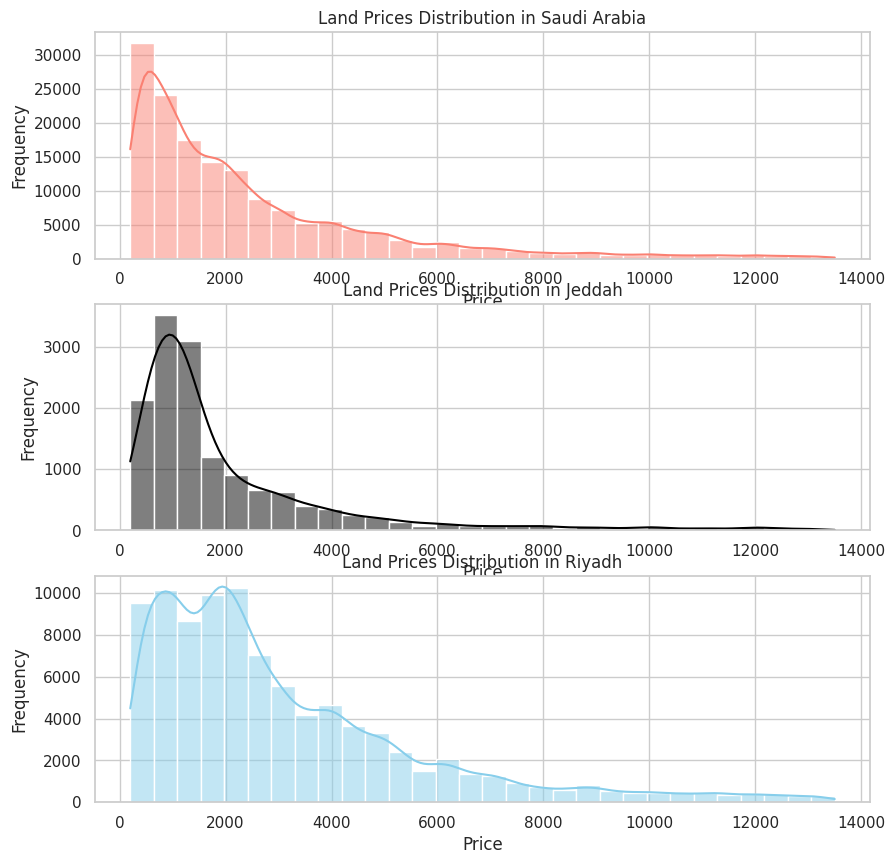

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

sns.histplot(df2['price'], bins=30, color='salmon', ax=axs[0], kde=True)
axs[0].set_title('Land Prices Distribution in Saudi Arabia')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')


sns.histplot(df2[df2['city'] == 'جدة']['price'], bins=30, color='black', ax=axs[1], kde=True)
axs[1].set_title('Land Prices Distribution in Jeddah')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')

sns.histplot(df2[df2['city'] == 'الرياض']['price'], bins=30, color='skyblue', ax=axs[2], kde=True)
axs[2].set_title('Land Prices Distribution in Riyadh')
axs[2].set_xlabel('Price')
axs[2].set_ylabel('Frequency')

plt.show()

## conclusion 2: Cities and Average Price (T-test)

Here we want to know what's the best city to invest in. That would obviously be difficult to find; yet, we can use the data we have to approach the correct answer.

We are going to use the average of prices as an indicatory of the value, importance, and economic importance of the sales and rentiles in a certain city. That can indirectly serve as a way to show which cities are safer to invest in.

In [ ]:
query = 'SELECT city, COUNT(id) as listings, AVG(price) FROM Listings GROUP BY city ORDER BY listings DESC'

pd.read_sql(query, conn).head(2)

,city,listings,AVG(price)
0,الرياض,353618,5.413916e+06
1,جدة,101712,2.648528e+06


We can see, as expected, that Riyadh and Jeddah are the highest two cities in terms of average of housing prices.

We should find the ration of variance between te two cities to see which one is more whispered.

In [ ]:
# 2-sample t-test on the land listing prices in two different cities

# Assumption check
riyadh = df2[df2['city'] == "الرياض"]['price']
jeddah = df2[df2['city'] == "جدة"]['price']

print("Riyadh to Jeddah variance ratio: ", riyadh.var() / jeddah.var())
print("Ratio within 1:4 and 4:1. Riyadh has greater variance.")


Riyadh to Jeddah variance ratio:  1.4451219808393054
Ratio within 1:4 and 4:1. Riyadh has greater variance.


Now moving to the T-test, we can set alpha to be a small number as 0.05; such small numbers are suitable for T-tests.
Let's set the null hypothesis: Land prices differ in Riyadh from Jeddah

In [ ]:
# 2-sample t-test
alpha = 0.05
t, p = stats.ttest_ind(riyadh, jeddah)
print("p-value: ", p)
print("Statistically, do land prices in Riyadh differ from Jeddah?: ", p < alpha)

p-value:  0.0
Statistically, do land prices in Riyadh differ from Jeddah?:  True


Because the land prices of Riyadh statistically differ from Jeddah, we choose to invest in one city only. Because the variance of land prices in Riyadh is greater than in Jeddah, we choose to invest in Riyadh for more room for low buys and high sells.

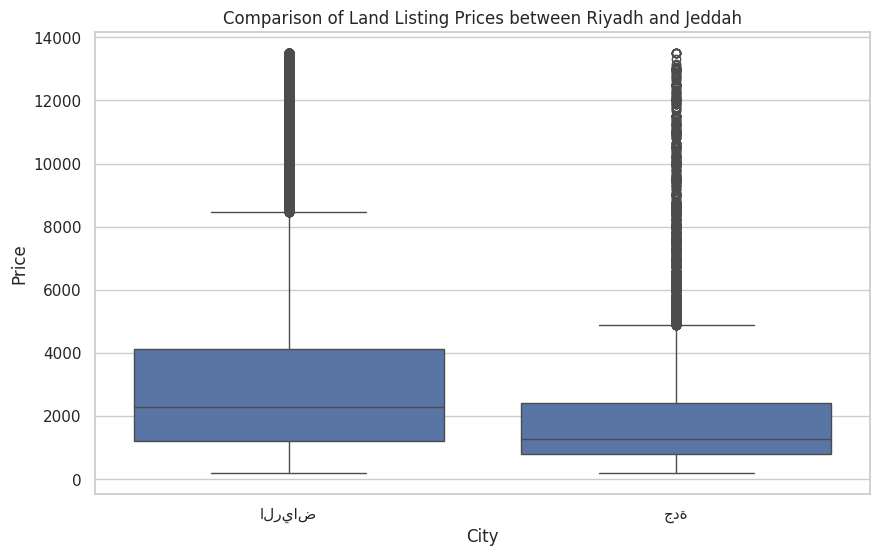

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x="city", y="price", data=df2[df2['city'].isin(["الرياض", "جدة"])])
plt.title("Comparison of Land Listing Prices between Riyadh and Jeddah")
plt.xlabel("City")
plt.ylabel("Price")
plt.show()

It is very clear to us how Riyadh is way more diverse that Jedda in land prices, and that although Jeddah and Riyadh has approximately the same level of minimum/maximum price, they differ in average, distribution, and quantity.

## conclusion 3: Polynomial Regression: Area and Price

We will use correlation and polynomial regression to know the best area range for high profit. This will be effective since polynomial regression is highly accurate in findion correlations, specially in this case.

First, let's calculate the correlation between area and price.

In [ ]:
print("The correlation between area and price is: ", df2['area'].corr(df2['price']))

The correlation between area and price is:  0.4735274653412635


Now, we are going to implemet what we learned to do a polynomial regression and implement it to find a more accurate correkation between land and area

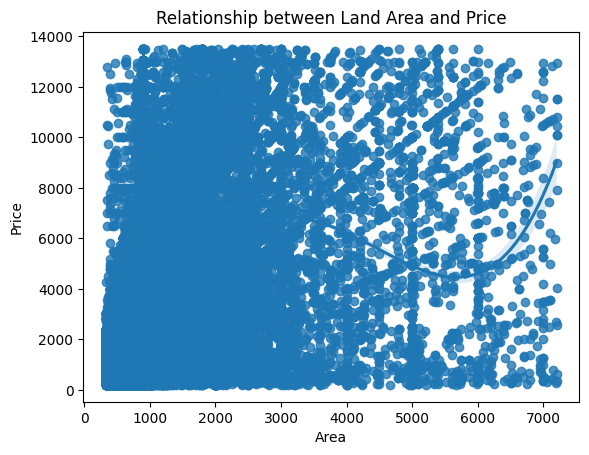

In [ ]:
df3 = df2
sns.regplot(x='area', y='price', data=df3, order=4)
plt.title('Relationship between Land Area and Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

The presented graph shaws a much higher density to the left than to the right, and also a higher density to the bottom than to the top.

The general correlation isalmost 0.45; however,in ranges between 1,000 < Area < 3,000, we can see how there are large sets of lands and properties that have prices as low as 1,000, and also many as high as 12,000 making a correlation of (2, 0.16) respictively.

What we're looking for is a range of large areas, while at the same availabe in high correlation with price, meaning price being as low as possible. Looking at te graph, we can see the range 3,500 < Area < 5,000 is the golden one for this. It has largely available sets of properties offered for prices lower than the Area itself, with correlation higher than 1.

Based on the fitting curve, we will invest in the 3,000-5,500 squared meters range.

# Machine Learning Analysis

We target land offers that have relatively low prices so that after we buy them we can shortly sell them at a profit. In order to do that, we need a model that estimates the value of a land using utilizing existing data of offers in the market. Let's attempt creating and using such a model using machine learning.

In [112]:
# We import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# We handle missing values by dropping rows in which they appear
df3 = df3.dropna()

The dependent variable, or output (y), is of course *price*.

By inspection, the following variables are potentially correlated to price, so we include them in the independent variables, or features (X):

- area
- district (district_id)
- street_width
- land width (width)
- land length (length)
- user review (user_review)
- advertiser type (advertiser_type)

Because advertiser type is non-numeric categorical, we make it numeric by assigning distinct integers (0, 1, 2, ...) to every unique category.

In [ ]:

advertiser_types = dict.fromkeys(list(X['advertiser_type'].unique()), 0)

ctr = 0
for k, v in advertiser_types.items():
  advertiser_types.update({k : v + ctr})
  ctr += 1

print(advertiser_types)

{'agent': 0, 'exclusive_marketer': 1, 'owner': 2, 'normal_marketer': 3}


In [ ]:
df3['advertiser_type'] = df3['advertiser_type'].map(lambda x: advertiser_types[x])
df3.head()

,user_id,id,price,category,area,street_width,user_review,user_name,city,city_id,district,district_id,width,length,advertiser_type,updatedAt
17352,87826,2669242,300.0,2,969,20.0,5.00,عبدالله,مكة المكرمة,94,حي العوالي,3752,30.0,32.0,0,2023-01-01 15:20:57.347 +00:00
17353,899032,2682232,300.0,2,661,20.0,4.48,مكتب قمة العارض للعقارات,الخرج,13,حي الراشدية,260,25.0,26.0,1,2023-01-01 18:45:17.363 +00:00
17355,602215,2786422,300.0,2,400,15.0,5.00,ابونايف,الرياض,21,حي الحائر,412,20.0,20.0,2,2023-01-01 14:48:41.219 +00:00
17356,498005,2790177,300.0,2,600,12.0,4.29,مؤسسة منقاش الافكار للخدمات العقارية,الرياض,21,حي المدينة الصناعية الجديدة,540,30.0,20.0,0,2023-01-01 14:26:22.937 +00:00
17371,82958,3234910,300.0,2,460,40.0,4.73,مكتب تراحيب جدة للتطوير والاستثمار العقاري,رابغ,73,حي الفرنيسية الشرقية,3664,23.0,20.0,0,2023-01-01 15:31:06.684 +00:00


In [ ]:
features = ['area', 'street_width', 'width', 'length', 'user_review', 'advertiser_type', 'district_id']
X = df3[features].copy()
y = df3['price'].copy()

**Training**

The first step in the training process it to split data. We use a 0.7-0.3 train-test split.

We transform the features to a standardized scale of values from -1 to 1 to make the learning process easier.

Because the more two lands are similar (same district, similar area, similar street width, etc) the more similar, we expect, their prices are, we use a machine learning model that compares a land offer to similar offers. We use K Nearest Neighbors.

Attempting to get better results, we use 3 models, each looking at a different number of neighbors. Specifically, we use 5-, 10-, and 20-neighbor models.

In [ ]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
models = {
    "KNN5": KNeighborsRegressor(n_neighbors=5),
    "KNN10": KNeighborsRegressor(n_neighbors=10),
    "KNN20": KNeighborsRegressor(n_neighbors=20)
}

In [ ]:
# We train each model
for model_name, model in models.items():
  model.fit(X_train_scaled, np.ravel(y_train))

In [ ]:
y_preds = []
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_preds.append(y_pred)
    r2 = r2_score(y_true=y_test, y_pred=y_pred)
    print(model_name, " R sqaured = ", r2)

KNN5  R sqaured =  0.5458730106223164
KNN10  R sqaured =  0.5437437688460882
KNN20  R sqaured =  0.5270694997175345


We observe that each of the models has a coefficient of determination $R^2 > 0.5$, meaning that the correlations the models uncovered are to the strong side.

Since our models' performance are not weak, we are happy with them and decide to use them to invest in real estate.

Every land offer has a unique id. Here, we make a function that predicts whether a land offer is favorable using our machine learning models.

We average the predicted differences between price and "real" value per each model.

In [123]:
def profitable(id) -> bool:
  land = df3[df3['id'] == id]
  price = land['price']
  x = scaler.fit_transform(land[features])

  profit = 0
  for model_name, model in models.items():
    y_pred = model.predict(x)
    profit += y_pred - price
  profit = profit / 3
  return profit > 0

Let's try our model on a sample of land offers.

In [125]:
df4 = df3[df3['category'] == 2]
rows = df4.sample(5)
values = rows['id'].unique()
for i in values:
  print("Land id: ", i)
  print("Predicted Profitability: ", profitable(i))

Land id:  4804882
Predicted Profitability:  27942    True
Name: price, dtype: bool
Land id:  4874349
Predicted Profitability:  109077    False
Name: price, dtype: bool
Land id:  5353694
Predicted Profitability:  52813    True
Name: price, dtype: bool
Land id:  5333717
Predicted Profitability:  154758    False
Name: price, dtype: bool
Land id:  5053727
Predicted Profitability:  166635    False
Name: price, dtype: bool
